# PD & NP for AI & ML GUIDE: By Lizette Cuevas
### GUÍA PD Y NP para IA y ML: Por Lizette Cuevas
A guide for Artificial Intelligence and Machine Learning using pandas and numpy

# Pokemon Database
As a first step, we will import a Pokemon database with information about 721 pokemons, which can be Legendary or Regular.

In [1]:
import pandas as pd
import numpy as np

In [2]:
pokdf = pd.read_csv('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv')

pokdf

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## Count NA's
Conteo de NA's

In [ ]:
pd.isna(pokdf).sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## Filter nulls and modify/replace values
Filtrar nulos y reemplazar/modificar valores

In [3]:
nulos = pd.isna(pokdf['Type 2'])
pokdf.loc[nulos, 'Type 2'] = 'WO type'

#pokdf.fillna('REEMPLAZO', inplace)

## Identify specific fields
Identificar campos específicos

In [ ]:
(pokdf == 100).sum()

#              1
Name           0
Type 1         0
Type 2         0
Total          0
HP            32
Attack        40
Defense       33
Sp. Atk       27
Sp. Def       28
Speed         31
Generation     0
Legendary      0
dtype: int64

In [ ]:
nulos = pd.isna(pokdf['Type 2'])
filtro_fire = pokdf['Type 1'] == 'Fire'
filtro_grass = pokdf['Type 1'] == 'Grass'
filtro_others = ~(filtro_fire & filtro_grass)

In [ ]:
#pokdf.loc[nulos & filtro_fuego, 'Type 2'] = 'Sin tipo F'
#pokdf.loc[nulos & filtro_grass, 'Type 2'] = 'Sin tipo P'
#pokdf.loc[nulos & filtro_others] = 'Sin tipo'

pokdf.loc[nulos & filtro_fuego, 'Type 2'].fillna('Sin tipo F', inplace = True)
pokdf.loc[nulos & filtro_grass, 'Type 2'].fillna('Sin tipo P', inplace = True)
pokdf.loc[:, 'Type 2'].fillna('Sin tipo', inplace = True)

pokdf

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Sin tipo F,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## Group
Agrupación

In [ ]:
#pd.options.display.max_rows = 140
pokdf.groupby(by = ['Type 1', 'Type 2']).mean()

#       Total         HP      Attack     Defense  \
Type 1 Type 2                                                                
Bug    Electric  595.500000  395.500000  60.000000   62.000000   55.000000   
       Fighting  214.000000  550.000000  80.000000  155.000000   95.000000   
       Fire      636.500000  455.000000  70.000000   72.500000   60.000000   
       Flying    286.285714  419.500000  63.000000   70.142857   61.571429   
       Ghost     292.000000  236.000000   1.000000   90.000000   45.000000   
...                     ...         ...        ...         ...         ...   
Water  Ice       103.000000  511.666667  90.000000   83.333333  113.333333   
       Poison    118.666667  426.666667  61.666667   68.333333   58.333333   
       Psychic   111.800000  481.000000  87.000000   73.000000  104.000000   
       Rock      430.000000  428.750000  70.750000   82.750000  112.750000   
       Steel     395.000000  530.000000  84.000000   86.000000   88.000000   

                    Sp. Atk     Sp. Def      Speed  Generation  Legendary  
Type 1 Type 2                                                              
Bug    Electric   77.000000   55.000000  86.500000    5.000000        0.0  
       Fighting   40.000000  100.000000  80.000000    2.000000        0.0  
       Fire       92.500000   80.000000  80.000000    5.000000        0.0  
       Flying     72.857143   69.071429  82.857143    2.857143        0.0  
       Ghost      30.000000   30.000000  40.000000    3.000000        0.0  
...                     ...         ...        ...         ...        ...  
Water  Ice        80.000000   78.333333  66.666667    1.000000        0.0  
       Poison     61.666667   91.666667  85.000000    1.333333        0.0  
       Psychic    94.000000   79.000000  44.000000    1.200000        0.0  
       Rock       61.500000   65.000000  36.000000    3.750000        0.0  
       Steel     111.000000  101.000000  60.000000    4.000000        0.0  

[136 rows x 10 columns]

## Relations
Relaciones

### Correlation (Correlación)
(únicamente numéricas)

Mayor correlación = Mayor predictibilidad

1.   Pearson (default) = Lineal (R^2, regresiones lineales)
2.   Spearman = No lineal. Cuidan que la congruencia de la relación se mantenga
3.   Kendall = No lineal. Cuidan que la congruencia de la relación se mantenga

In [ ]:
# Métodos: Pearson (default), Kendall y Spearman

# mayor a 0.7, guardar variable
pokdf.corr(method = 'spearman')

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.121887,0.119968,0.102668,0.117444,0.088443,0.075666,0.018775,0.983581,0.154336
Total,0.121887,1.000000,0.712736,0.720131,0.681864,0.729735,0.756992,0.567659,0.053807,0.443863
HP,0.119968,0.712736,1.000000,0.565734,0.433402,0.470813,0.493280,0.265920,0.081784,0.295348
Attack,0.102668,0.720131,0.565734,1.000000,0.514995,0.361616,0.320620,0.373443,0.054140,0.316741
Defense,0.117444,0.681864,0.433402,0.514995,1.000000,0.314217,0.578816,0.092818,0.057776,0.268258
Sp. Atk,0.088443,0.729735,0.470813,0.361616,0.314217,1.000000,0.571757,0.460220,0.039242,0.372532
Sp. Def,0.075666,0.756992,0.493280,0.320620,0.578816,0.571757,1.000000,0.320649,0.018625,0.329321
Speed,0.018775,0.567659,0.265920,0.373443,0.092818,0.460220,0.320649,1.000000,-0.014198,0.313383
Generation,0.983581,0.053807,0.081784,0.054140,0.057776,0.039242,0.018625,-0.014198,1.000000,0.079277
Legendary,0.154336,0.443863,0.295348,0.316741,0.268258,0.372532,0.329321,0.313383,0.079277,1.000000


### PPSCORE (Power Prediction Score)

In [ ]:
# mayor a 0.5, guardar variable
pip install ppscore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=55715e3c680d66dca319ddc099f109e71ed4a347c399efc9f204ffa9bc0b760e
  Stored in directory: /root/.cache/pip/wheels/d8/2d/fc/c1699298a1241684a460b125835f7871ee8e3ab3afea9b5d6f
Successfully built ppscore


In [ ]:
import ppscore as pps
import warnings

warnings.filterwarnings('ignore')
# pd.options.display.max_rows = 500
ppscoreTable = pps.matrix(pokdf)
ppscoreTable.loc[ppscoreTable['y']=='Legendary']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
12,#,Legendary,0.803659,classification,True,weighted F1,0.879845,0.976409,DecisionTreeClassifier()
25,Name,Legendary,0.000000,feature_is_id,True,None,0.000000,0.000000,None
38,Type 1,Legendary,0.000000,classification,True,weighted F1,0.879845,0.878596,DecisionTreeClassifier()
51,Type 2,Legendary,0.000000,classification,True,weighted F1,0.857525,0.857522,DecisionTreeClassifier()
64,Total,Legendary,0.629947,classification,True,weighted F1,0.879845,0.955536,DecisionTreeClassifier()
77,HP,Legendary,0.116291,classification,True,weighted F1,0.879845,0.893818,DecisionTreeClassifier()
90,Attack,Legendary,0.121663,classification,True,weighted F1,0.879845,0.894464,DecisionTreeClassifier()
103,Defense,Legendary,0.000000,classification,True,weighted F1,0.879845,0.879079,DecisionTreeClassifier()
116,Sp. Atk,Legendary,0.309362,classification,True,weighted F1,0.879845,0.917017,DecisionTreeClassifier()
129,Sp. Def,Legendary,0.000000,classification,True,weighted F1,0.879845,0.874936,DecisionTreeClassifier()


## Bin Outliers (Acotar Valores atípicos)
**Quantil:** Porcentaje de los datos en cuantiles para saber qué porcentaje de los datos atípicos remover, dependiendo del porcentaje usado.

**Tip:** Usar el mismo porcentaje del límite menor que del límite mayor

array([[<AxesSubplot:title={'center':'#'}>,
        <AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'HP'}>],
       [<AxesSubplot:title={'center':'Attack'}>,
        <AxesSubplot:title={'center':'Defense'}>,
        <AxesSubplot:title={'center':'Sp. Atk'}>],
       [<AxesSubplot:title={'center':'Sp. Def'}>,
        <AxesSubplot:title={'center':'Speed'}>,
        <AxesSubplot:title={'center':'Generation'}>]], dtype=object)

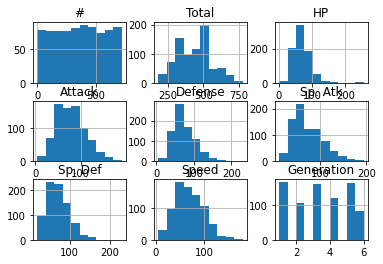

In [ ]:
# Se busca primero la distribución
pokdf.hist()

In [ ]:
# Quantil superior
pokdf.HP.quantile(0.95)
# Quantil inferior
pokdf.HP.quantile(0.05)

35.95

In [ ]:
# Una sola columna
pokdf.HP.clip(35,150)

# Varias columnas
pokdf.loc[:,['Total', 'HP', 'Attack']].clip(10,60)

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64

### Bin outliers to the percentage of the quantil
Cortar atípicos al rango del cuantil

In [ ]:
for panchito in ['Attack', 'HP', 'Defense']:
    lim_sup = pokdf.loc[:, panchito].quantile(0.97)
    lim_inf = pokdf.loc[:, panchito].quantile(0.03)
    pokdf[panchito].clip(lim_sup, lim_inf, inplace = True)

### Remove null values
Quitar valores nulos

In [ ]:
for panchita in ['Attack', 'Defense']:
    x = pokdf.loc[:, panchita].mean()
    pokdf.loc[:, panchita].fillna(x, inplace = True)

In [ ]:
for panchita in ['Type 1', 'Type 2']:
    x = pokdf.loc[:, panchita].mode()
    pokdf[panchita].fillna(x[0], inplace = True)
pokdf

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Flying,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
for panchita in ['Type 1', 'Type 2']:
    pokdf[panchita].fillna('Sin valor', inplace = True)
pokdf

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Sin valor,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
